In [14]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
data  = student_performance.data.features
target = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [16]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


In [17]:
target

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


In [18]:
# Step 2: Characterization
print("Characterization:")
print(data.describe())

Characterization:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      

In [19]:
# Selecting a range of columns using slicing
# X_df = X.loc[:, 1:5]

# Selecting a range of columns using iloc for integer-based indexing
X_df = data.iloc[:, 1:8]

In [20]:
X_df

,sex,age,address,famsize,Pstatus,Medu,Fedu
0,F,18,U,GT3,A,4,4
1,F,17,U,GT3,T,1,1
2,F,15,U,LE3,T,1,1
3,F,15,U,GT3,T,4,2
4,F,16,U,GT3,T,3,3
...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3
645,F,18,U,LE3,T,3,1
646,F,18,U,GT3,T,1,1
647,M,17,U,LE3,T,3,1


In [21]:
# Add the target variable as a column to the DataFrame
X_df['target'] = target['G1']

In [22]:
y = target['G1']

In [23]:
y

0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64

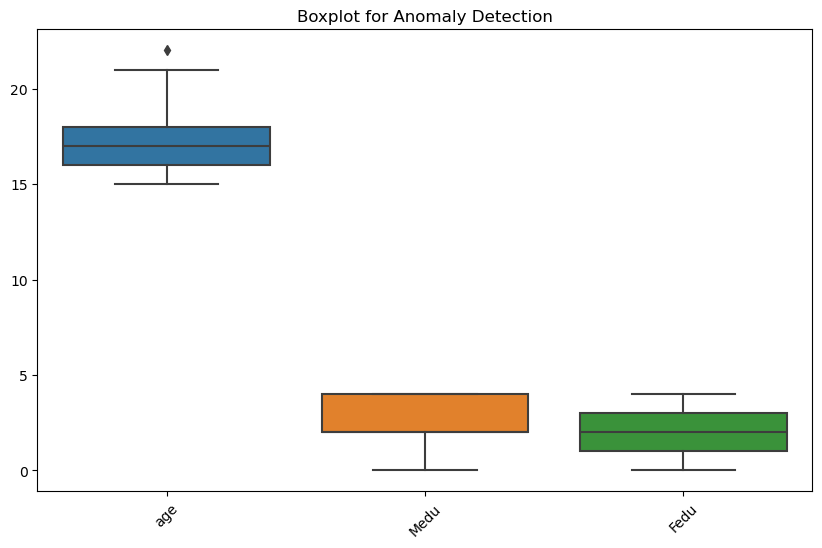

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly detection
# Detecting anomalies using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_df.drop(columns='target'))
plt.title('Boxplot for Anomaly Detection')
plt.xticks(rotation=45)
plt.show()

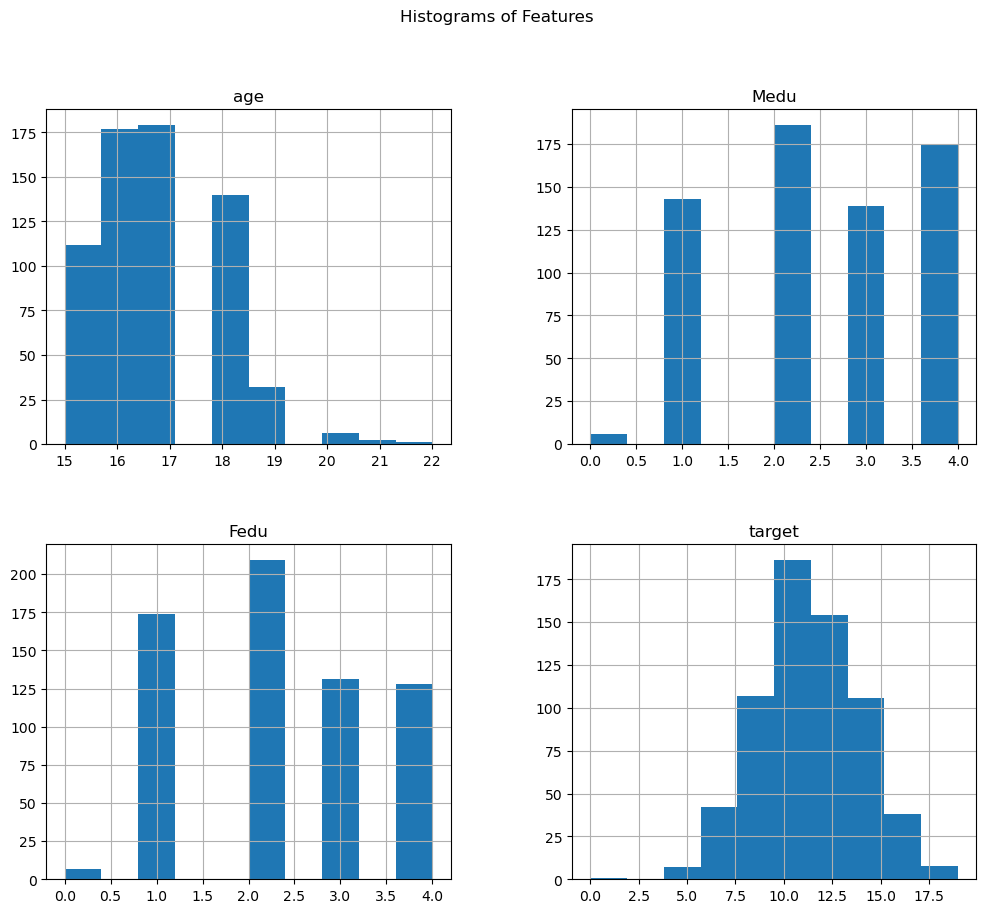

In [25]:
# 2. Data Visualization
# Histograms
X_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


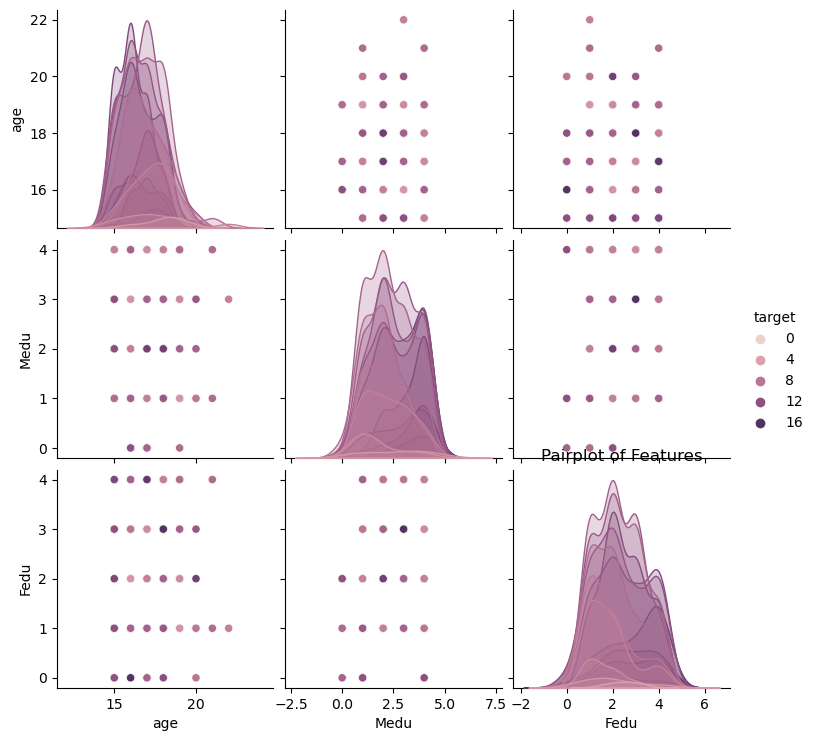

In [26]:
# Scatter plots
sns.pairplot(data=X_df, hue='target')
plt.title('Pairplot of Features')
plt.show()

In [27]:
# Matrix plots
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'F'

<Figure size 1000x800 with 0 Axes>

In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from ucimlrepo import fetch_ucirepo

style.use("ggplot")

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

student_performance


{'data': {'ids': None,
  'features':     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
  0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
  1       GP   F   17       U     GT3       T     1     1   at_home     other   
  2       GP   F   15       U     LE3       T     1     1   at_home     other   
  3       GP   F   15       U     GT3       T     4     2    health  services   
  4       GP   F   16       U     GT3       T     3     3     other     other   
  ..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
  644     MS   F   19       R     GT3       T     2     3  services     other   
  645     MS   F   18       U     LE3       T     3     1   teacher  services   
  646     MS   F   18       U     GT3       T     1     1     other     other   
  647     MS   M   17       U     LE3       T     3     1  services  services   
  648     MS   M   18       R     LE3       T     3     2  services     ot

Accuracy: -0.061782810097103624
Accuracy: -0.053848181769716064
Accuracy: -0.036252566761423966
Accuracy: -0.01248461325121597
Accuracy: -0.04060923495290347
Accuracy: -0.08936318793917941
Accuracy: -0.03368425532322772
Accuracy: -0.020716477244583587
Accuracy: -0.026646702644078646
Accuracy: -0.028147131600392505
Accuracy: -0.0214240955720022
Accuracy: -0.04530776347726695
Accuracy: -0.01225056940852487
Accuracy: -0.09246453394578569
Accuracy: -0.013922326989327605
Accuracy: -0.017849475395619097
Accuracy: -0.06778174317807739
Accuracy: -0.027007821011628685
Accuracy: -0.010145856207196546
Accuracy: -0.012146879484469242
Accuracy: -0.008896362276224146
Accuracy: -0.013437957528919853
Accuracy: -0.13506344367717427
Accuracy: -0.011532992777390172
Accuracy: -0.028794785117628896
Accuracy: -0.017264589388304552
Accuracy: -0.013403404132646735
Accuracy: -0.13587463329018679
Accuracy: -0.004313741910972668
Accuracy: -0.0012723770529858847
Accuracy: -0.09971396870590321
Accuracy: -0.0156801

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: -0.07281055348061116
Accuracy: -0.012206971170922731
Accuracy: -0.017700900573343503
Accuracy: -0.01525389640625896
Accuracy: -0.02422543387122289
Accuracy: -0.036225138524414335
Accuracy: -0.06572218074731495
Accuracy: -0.006253402038749911
Accuracy: -0.011285353299820722
Accuracy: -0.12658598846697577
Accuracy: -0.06468274134286034
Accuracy: -0.15245389798318665
Accuracy: -0.05221867625337273
Accuracy: -0.1428850201905716
Accuracy: -0.016569815966789525
Accuracy: -0.015191830230895764
Accuracy: -0.012486353938566674
Accuracy: -0.03745314319458104
Accuracy: -0.041462962290057304
Accuracy: -0.013949750106097003
Accuracy: -0.06109000067905024
Accuracy: -0.02295646354039782
Accuracy: -0.009173630303701552
Accuracy: -0.030259431371714385
Accuracy: -0.028612767954089513
Accuracy: -0.024761285375198616
Accuracy: -0.022288948303837985
Accuracy: -0.05832050860209814
Accuracy: -0.09617047299087589
Accuracy: -0.020577892839054313
Accuracy: -0.045147700632643284
Accuracy: -0.0196269275

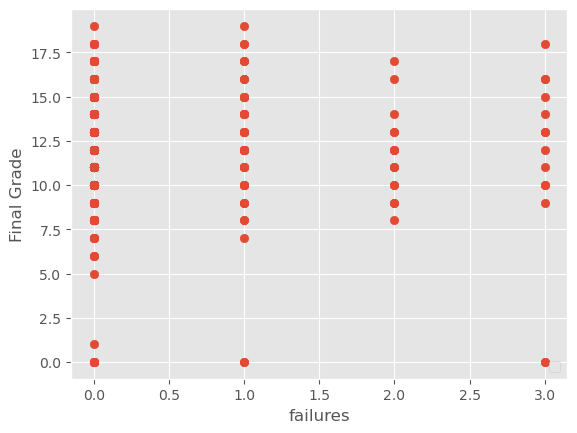

In [73]:
# Data (as pandas dataframes)
data = student_performance.data.features
target = student_performance.data.targets

# Select the value we want to predict
predict = "G3"

# List the variables we want to use for our predictions in this model
data = data[["studytime", "health", "famrel", "failures", "absences"]]

# Convert target to numpy array
target = np.array(target[predict])

data = shuffle(data)

x = np.array(data)
y = target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

# Train model multiple times to find the highest accuracy
best = 0
for _ in range(200):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

# Load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

predictions = linear.predict(x_test)

# Print the predictions, the variables we used and the actual final grade
for i in range(len(predictions)):
    print("Predicted Final grade:", predictions[i], "Data:", x_test[i], "Final grade:", y_test[i])

# Create visualisation of the model
plot = "failures"
plt.scatter(data[plot], target)
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

# Write a manual linear regression and compare with the above

In [78]:




# Split the data into training and testing sets
x_train, x_test = data[:int(0.9*len(data))], data[int(0.9*len(data)):]
y_train, y_test = target[:int(0.9*len(target))], target[int(0.9*len(target)):]

# Implementing Linear Regression manually
class LinearRegressionCustom:
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            gradient_weights = -(2 / len(X)) * np.dot(X.T, (y - y_pred))
            gradient_bias = -(2 / len(X)) * np.sum(y - y_pred)

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


import numpy as np

class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.matrix = self._compute_confusion_matrix()

    def _compute_confusion_matrix(self):
        unique_labels = np.unique(np.concatenate((self.y_true, self.y_pred)))
        self.confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))
        for i in range(len(unique_labels)):
            for j in range(len(unique_labels)):
                self.confusion_matrix[i, j] = np.sum(np.logical_and(self.y_true == unique_labels[i], self.y_pred == unique_labels[j]))

class EvaluationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.confusion_matrix = ConfusionMatrix(y_true, y_pred).confusion_matrix
        self.metrics = self._compute_metrics()

    def _compute_metrics(self):
        confusion_matrix = self.confusion_matrix

        sensitivity = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
        specificity = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
        fpr = 1 - specificity
        fnr = 1 - sensitivity
        precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
        recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
        f1_score = 2 * precision * recall / (precision + recall)

        self.metrics = {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'FPR': fpr,
            'FNR': fnr,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }

        return self.metrics

In [79]:
# Create and train the model
model = LinearRegressionCustom()
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate model
evaluation = EvaluationMetrics(y_test, np.round(predictions))
metrics = evaluation.metrics
for key, value in metrics.items():
    print(f"{key}: {value}")




Sensitivity: [0.         0.         0.         0.         0.         0.33333333
 0.6        0.25       0.16666667 0.         0.         0.
 0.         0.        ]
Specificity: [       nan 0.         0.         0.         0.         0.14285714
 0.14285714 0.11111111 0.125      0.         0.         0.
        nan        nan]
FPR: [       nan 1.         1.         1.         1.         0.85714286
 0.85714286 0.88888889 0.875      1.         1.         1.
        nan        nan]
FNR: [1.         1.         1.         1.         1.         0.66666667
 0.4        0.75       0.83333333 1.         1.         1.
 1.         1.        ]
Precision: [       nan 0.         0.         0.         0.         0.14285714
 0.14285714 0.11111111 0.125      0.         0.         0.
        nan        nan]
Recall: [0.         0.         0.         0.         0.         0.33333333
 0.6        0.25       0.16666667 0.         0.         0.
 0.         0.        ]
F1 Score: [       nan        nan        nan  

C:\Users\ammar\AppData\Local\Temp\ipykernel_13884\563005963.py:56: RuntimeWarning: invalid value encountered in divide
  specificity = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
C:\Users\ammar\AppData\Local\Temp\ipykernel_13884\563005963.py:59: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
C:\Users\ammar\AppData\Local\Temp\ipykernel_13884\563005963.py:61: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * precision * recall / (precision + recall)


In [80]:
# Create visualization of the model
plot = "failures"
plt.scatter(x_test[:, data.values.tolist().index(plot)], y_test, color='blue', label='Actual Final Grade')
plt.scatter(x_test[:, data.values.tolist().index(plot)], predictions, color='red', label='Predicted Final Grade')
plt.legend(loc='upper right')
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.title("Linear Regression Prediction")
plt.show()

ValueError: 'failures' is not in list